In [26]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Load the dataset
df = pd.read_csv('../../../data/XAUUSD_2010-2023.csv').head(1000)
df

,time,open,high,low,close,rsi14,sma14
0,2010-01-03 18:00:00,1098.45,1100.00,1098.05,1099.95,81.98,1096.38
1,2010-01-03 18:05:00,1100.00,1100.30,1099.45,1099.75,79.17,1096.72
2,2010-01-03 18:10:00,1099.70,1100.10,1099.30,1099.45,75.02,1097.03
3,2010-01-03 18:15:00,1099.50,1099.60,1098.50,1099.45,75.02,1097.30
4,2010-01-03 18:20:00,1099.40,1099.60,1098.90,1098.90,67.50,1097.50
...,...,...,...,...,...,...,...
995,2010-01-07 06:40:00,1131.73,1131.85,1130.70,1131.05,47.60,1131.43
996,2010-01-07 06:45:00,1131.03,1131.05,1129.95,1130.05,42.59,1131.39
997,2010-01-07 06:50:00,1130.28,1130.55,1130.05,1130.25,43.86,1131.34
998,2010-01-07 06:55:00,1130.23,1130.45,1130.05,1130.10,43.09,1131.33


In [28]:
print(df.dtypes)

time      object
open     float64
high     float64
low      float64
close    float64
rsi14    float64
sma14    float64
dtype: object


In [29]:
# Convert the 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

In [30]:

# Select relevant features for clustering
features = [
    'open',
    'high',
    'low',
    'close',
    # 'rsi14',
    'sma14'
]
X = df[features]

In [31]:

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
wcss

[5000.0,
 1906.8014405021036,
 490.2500149266859,
 276.1883607962036,
 211.163689261272,
 162.231933471845,
 116.86148034603377,
 88.76710765817418,
 81.58050262703523,
 69.90262579913428]

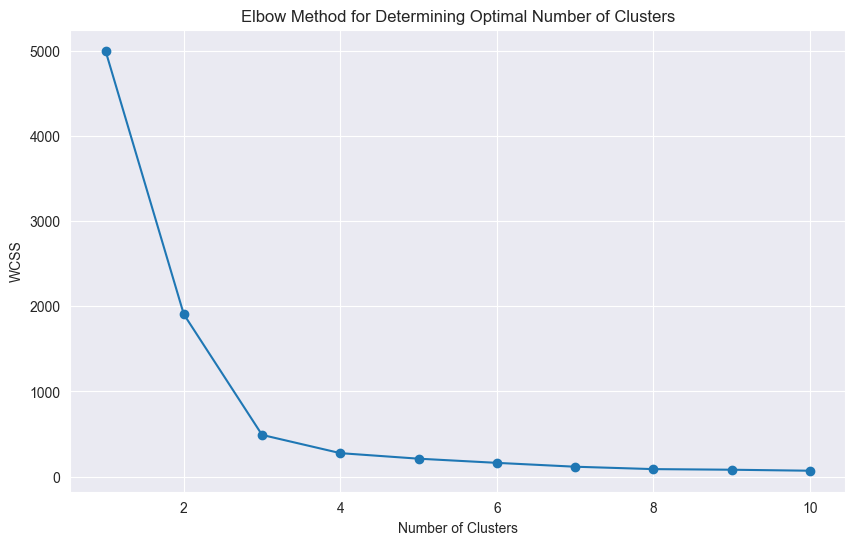

In [33]:

# Plot the elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11, 1), wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.show()

In [34]:

# Apply K-Means clustering with the optimal number of clusters
optimal_clusters = 4  # Based on the elbow method graph
kmeans = KMeans(
    n_clusters=optimal_clusters,
    random_state=42
)
df['Cluster'] = kmeans.fit_predict(X_scaled)
df['Cluster']

0      2
1      2
2      2
3      2
4      2
      ..
995    3
996    3
997    3
998    3
999    3
Name: Cluster, Length: 1000, dtype: int32

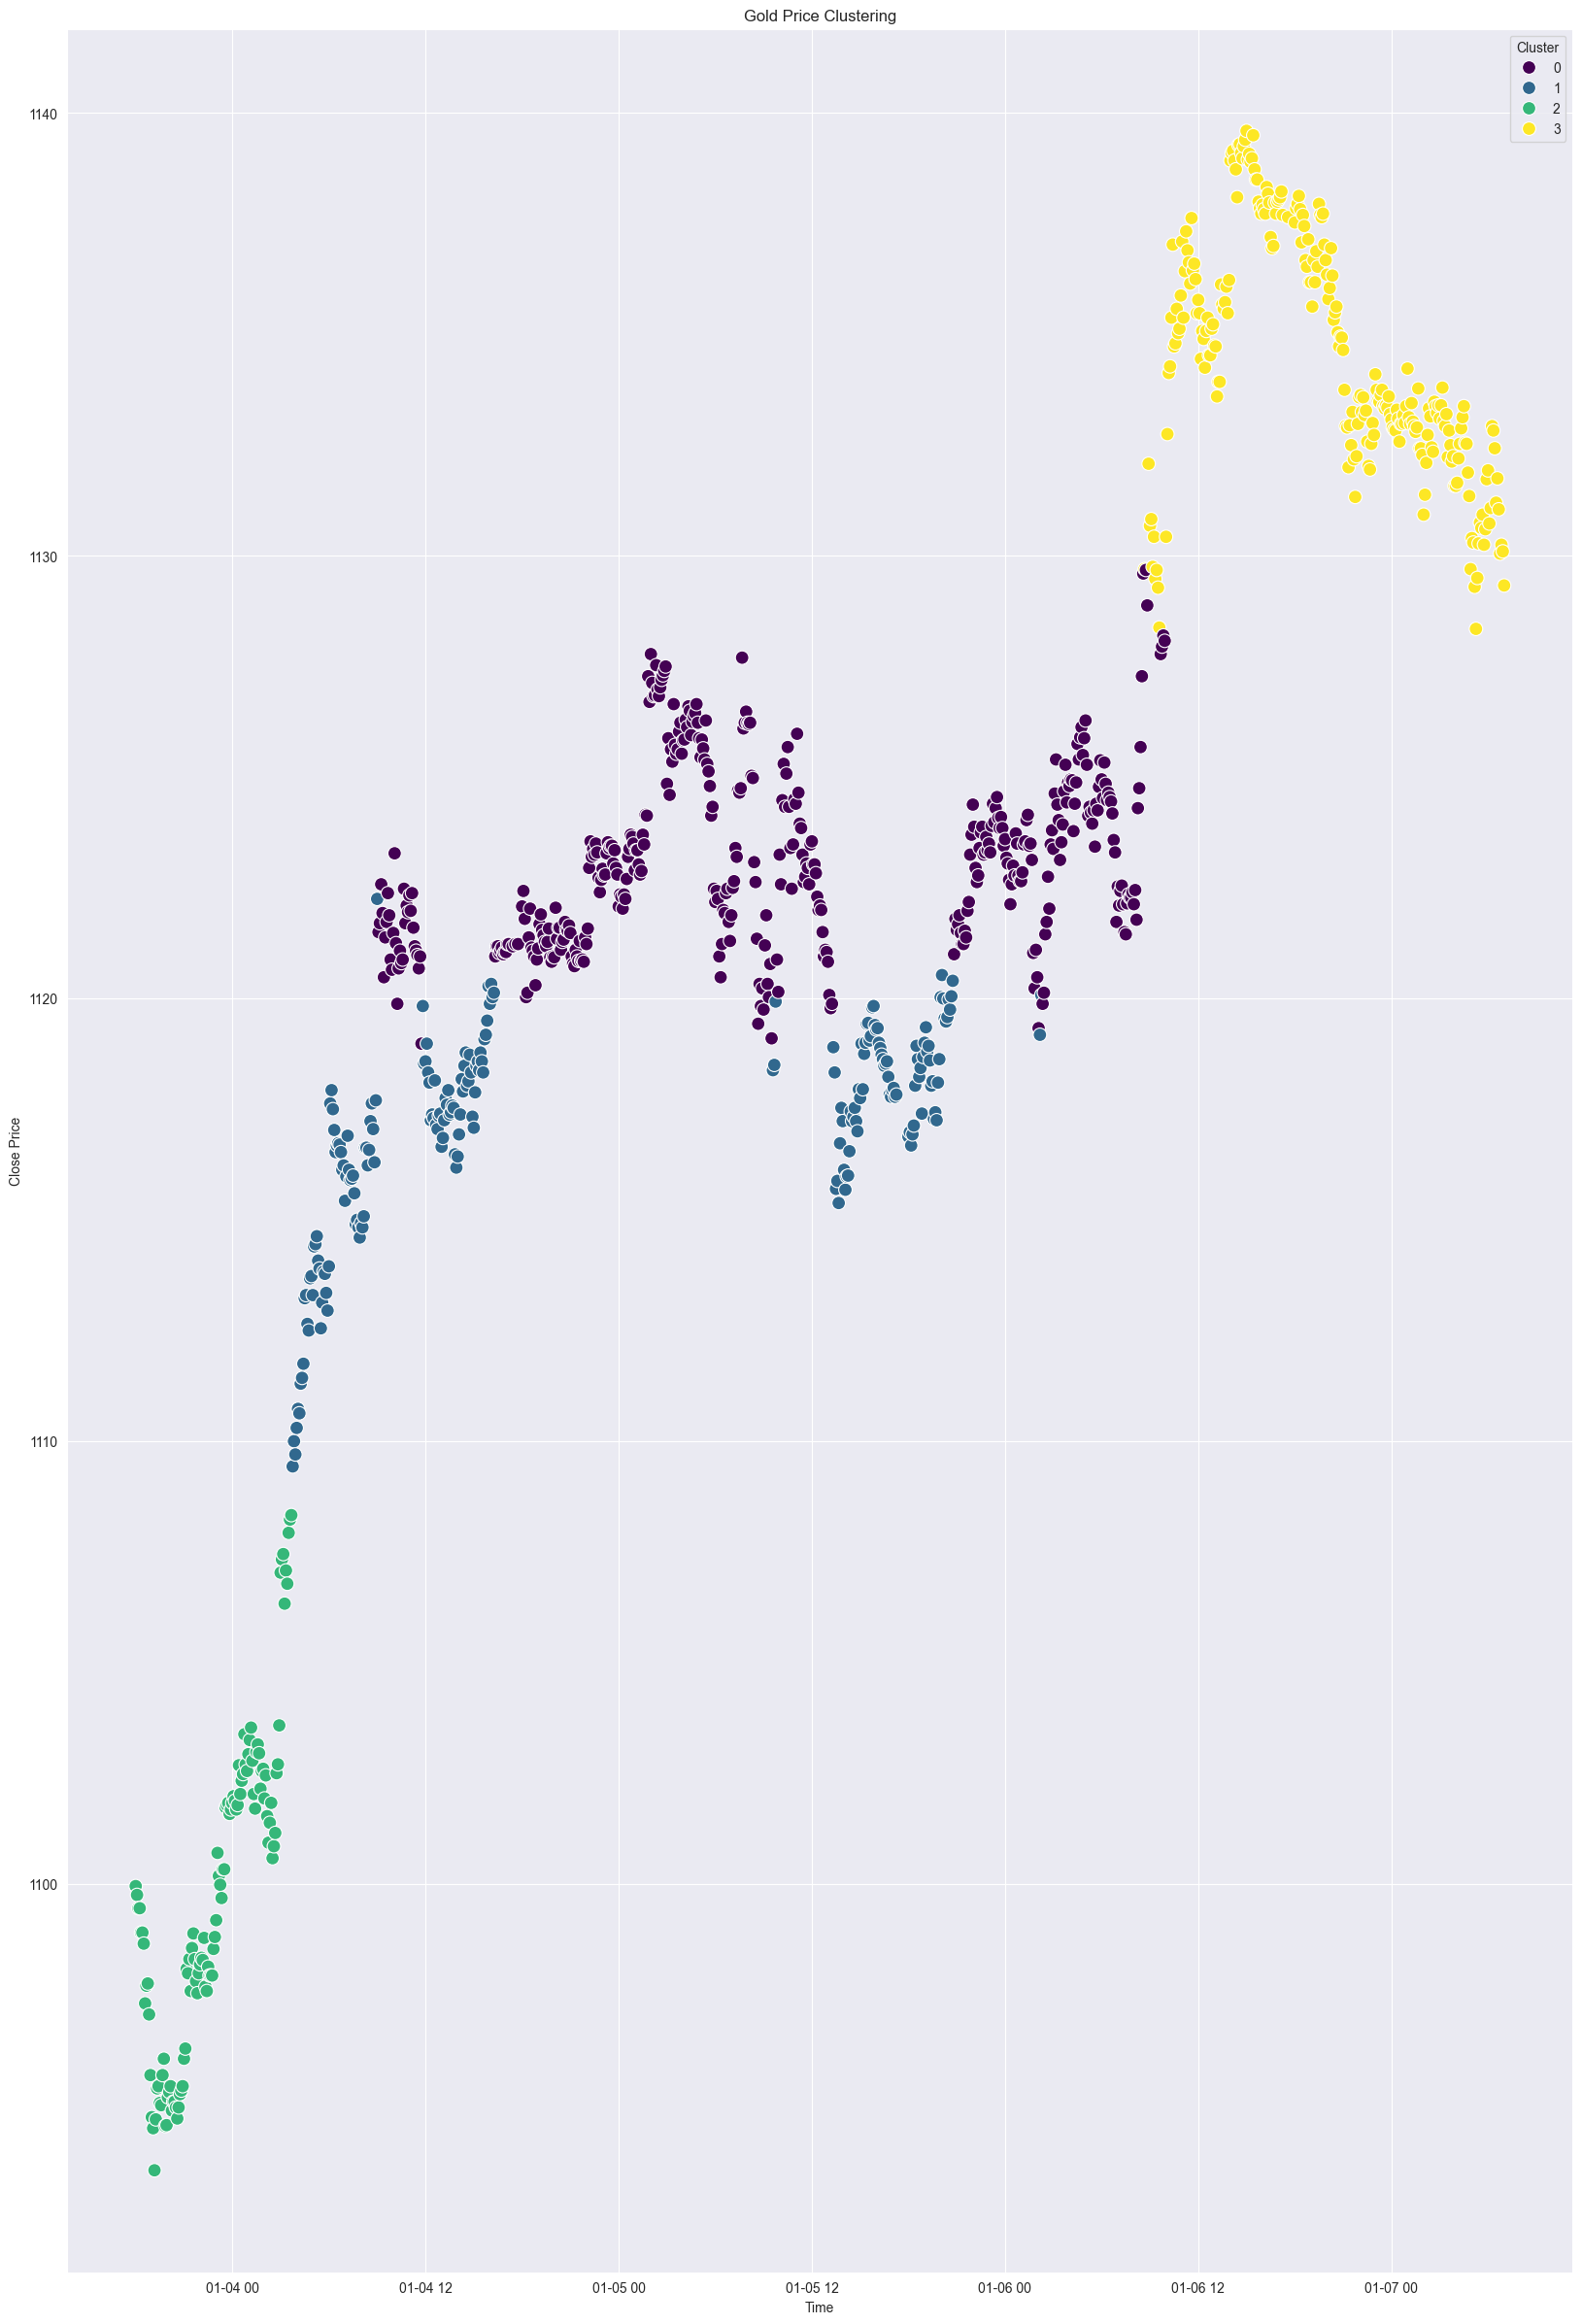

In [35]:

# Visualize the clusters
plt.figure(figsize=(20, 30))
sns.scatterplot(
    data=df,
    x='time',
    y='close',
    hue='Cluster',
    palette='viridis',
    s=100)
plt.title('Gold Price Clustering')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend(title='Cluster')
plt.show()


<Figure size 1500x1000 with 0 Axes>

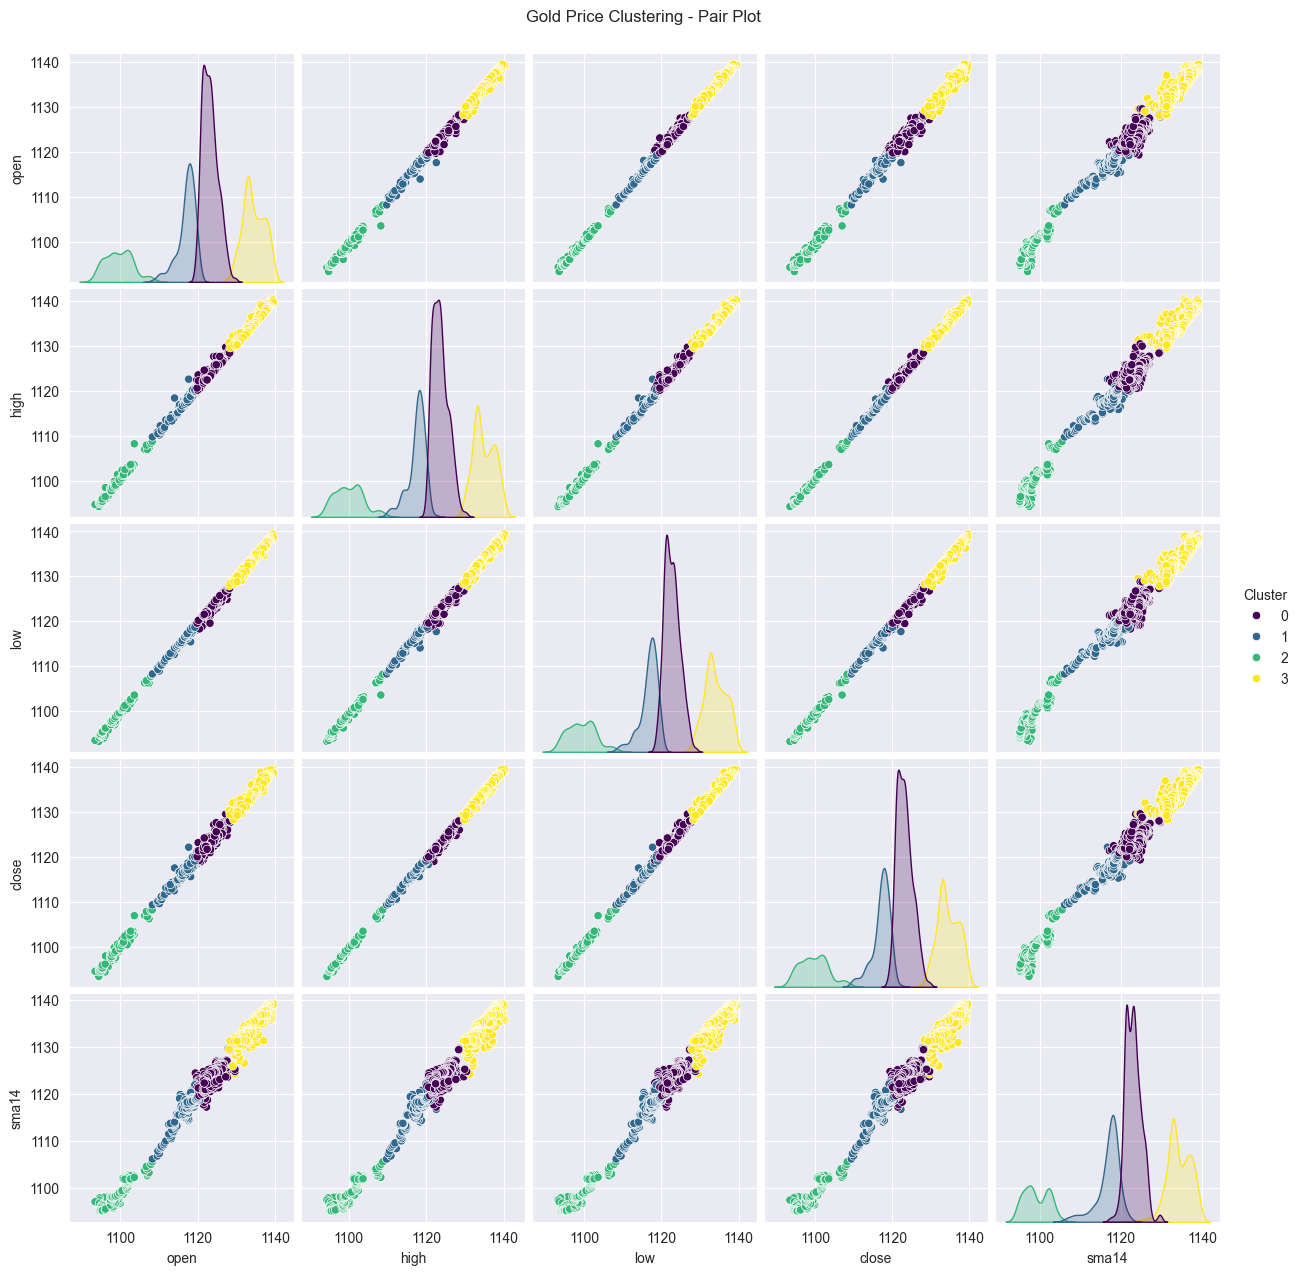

In [36]:
# Visualize clusters using a pair plot
plt.figure(figsize=(15, 10))
sns.pairplot(df, vars=features, hue='Cluster', palette='viridis')
plt.suptitle('Gold Price Clustering - Pair Plot', y=1.02)
plt.show()

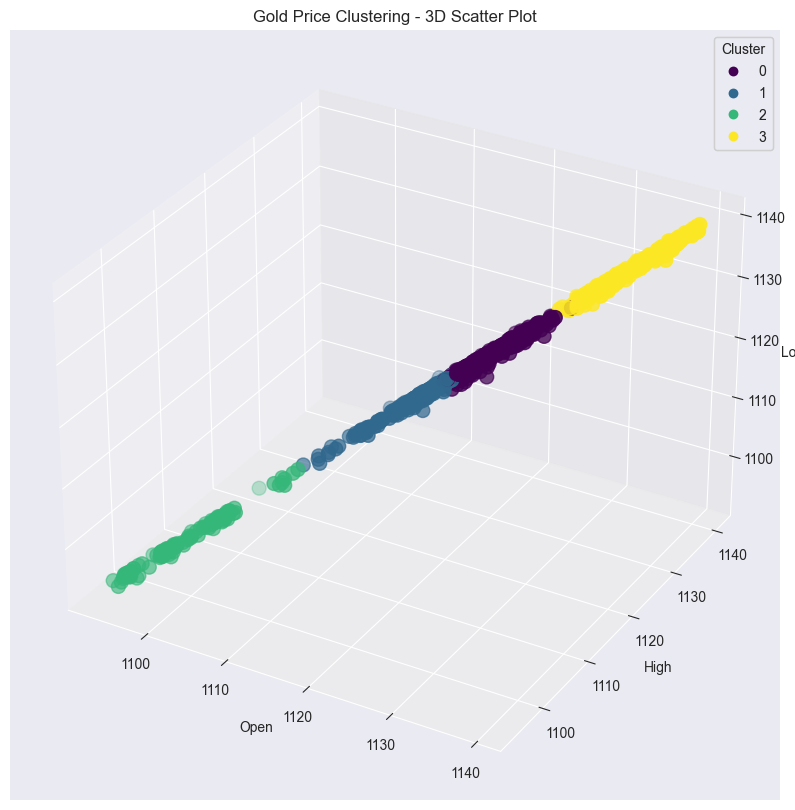

In [37]:
from mpl_toolkits.mplot3d import Axes3D

# Visualize clusters using a 3D scatter plot
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['open'], df['high'], df['low'], c=df['Cluster'], cmap='viridis', s=100)
ax.set_title('Gold Price Clustering - 3D Scatter Plot')
ax.set_xlabel('Open')
ax.set_ylabel('High')
ax.set_zlabel('Low')
legend = ax.legend(*scatter.legend_elements(), title='Cluster')
ax.add_artist(legend)
plt.show()


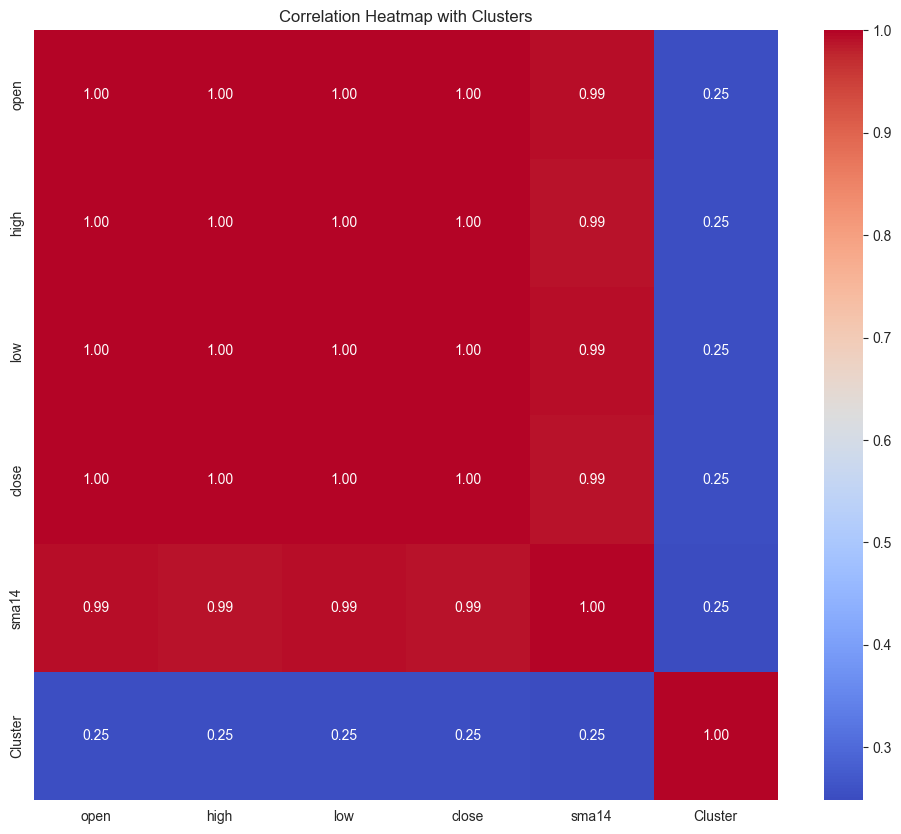

In [38]:
# Visualize clusters using a heatmap
plt.figure(figsize=(12, 10))
corr = df[features + ['Cluster']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap with Clusters')
plt.show()


C:\Users\liar88828\AppData\Local\Temp\ipykernel_1416\3765562820.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\liar88828\AppData\Local\Temp\ipykernel_1416\3765562820.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\liar88828\AppData\Local\Temp\ipykernel_1416\3765562820.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\liar88828\AppData\Local\Temp\ipykernel_1416\3765562820.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variab

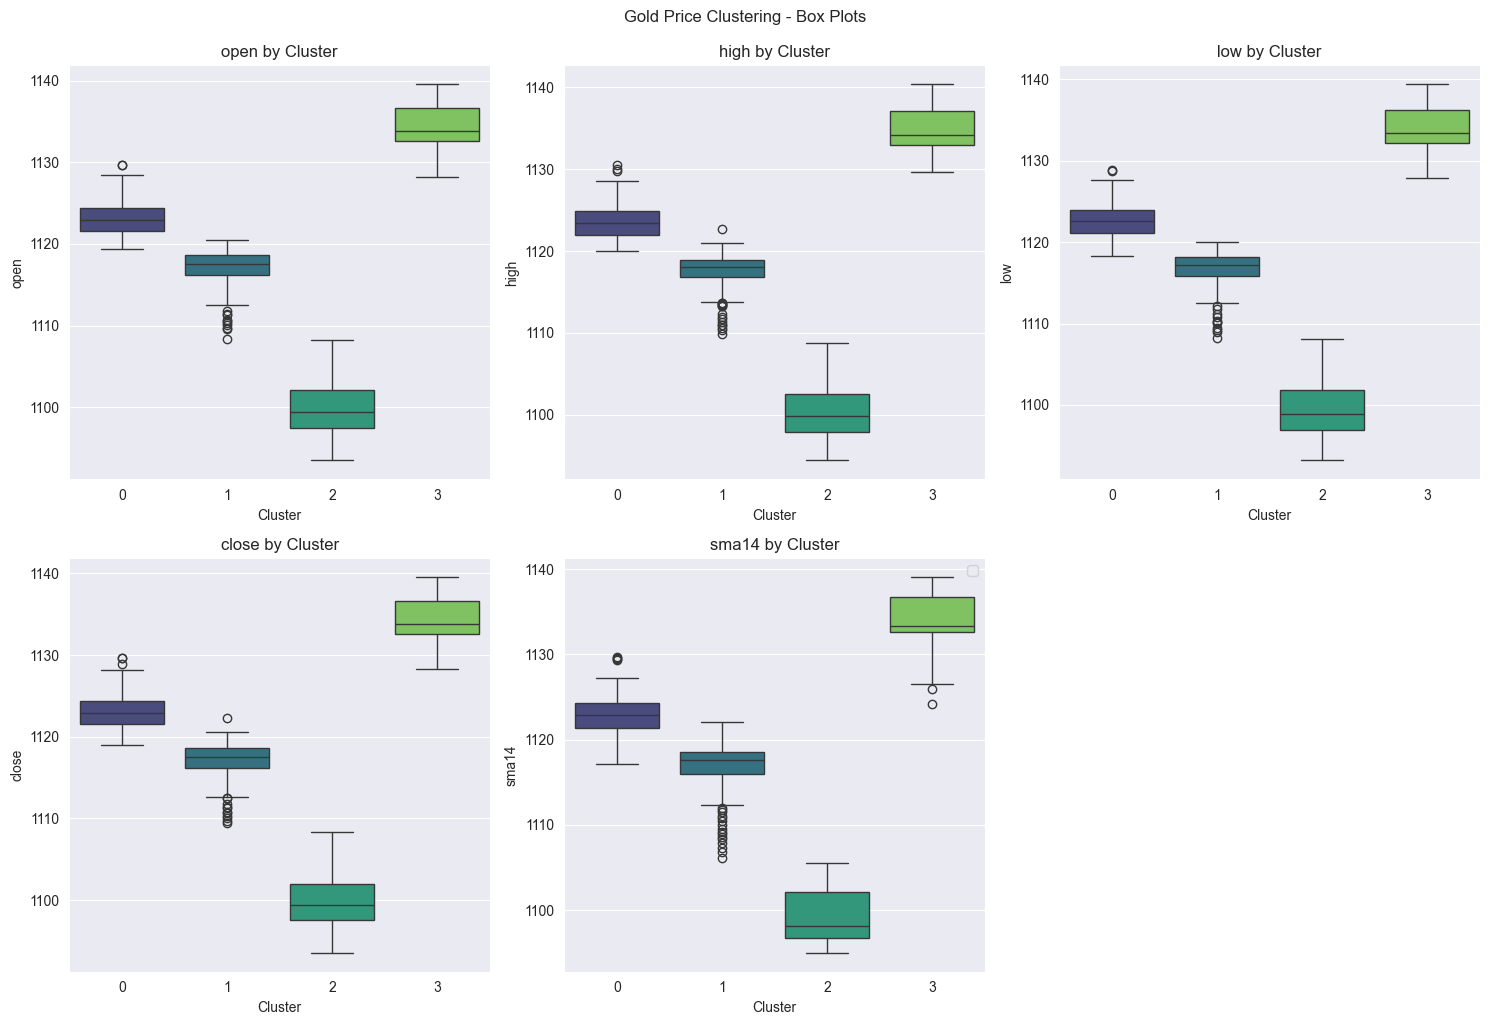

In [42]:
# Visualize clusters using box plots
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(
        data=df,
        x='Cluster',
        y=feature,
        palette='viridis')
    plt.title(f'{feature} by Cluster')
plt.tight_layout()
plt.suptitle(
    'Gold Price Clustering - Box Plots',
    y=1.02)


plt.legend()
plt.show()

In [0]:

# # Visualize the clusters
# plt.figure(figsize=(20, 30))
# sns.boxplot(
#     data=df,
#     x='time',
#     y='close',
#     hue='Cluster',
#     palette='viridis',
#     s=100)
# plt.title('Gold Price Clustering')
# plt.xlabel('Time')
# plt.ylabel('Close Price')
# plt.legend(title='Cluster')
# plt.show()

In [14]:
# Visualize the clusters
plt.figure(figsize=(20, 30))
sns.barplot(
    data=df,
    x='time',
    y='close',
    hue='Cluster',
    palette='viridis',
    # s=100
)
plt.title('Gold Price Clustering')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend(title='Cluster')
plt.show()


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x000001F054D14EE0> (for post_execute), with arguments args (),kwargs {}:



KeyboardInterrupt



Error in callback <function flush_figures at 0x000001F072BDE200> (for post_execute), with arguments args (),kwargs {}:



KeyboardInterrupt



In [1]:

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 3), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

NameError: name 'KMeans' is not defined

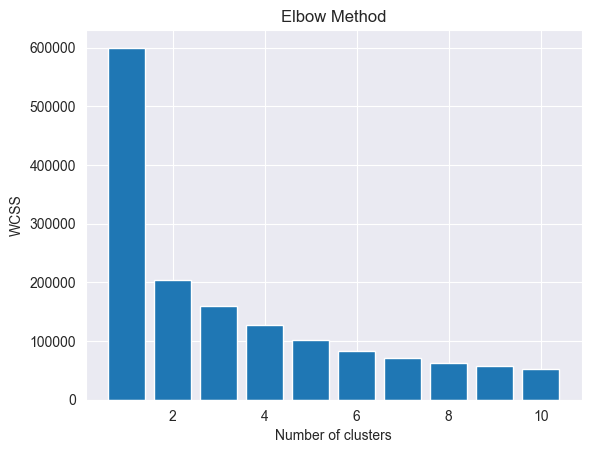

In [49]:
# Plot the elbow curve
plt.bar(range(1, 3), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()